In [2]:
#Python Script: Data Collection & Understanding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load Dataset
# ----------------------------
df = pd.read_csv("C:\\Users\\Pol\\Desktop\\AIM ASS\\Capstone\\customer_data.csv")

# Preview data
print("Dataset Preview:")
display(df.head())

print("\nDataset Shape:")
print(df.shape)

Dataset Preview:


,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5



Dataset Shape:
(100000, 12)


In [4]:
# 2. Data Types & Structure
# ----------------------------
print("\nData Types:")
print(df.dtypes)

print("\nBasic Info:")
df.info()


Data Types:
id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchas

In [5]:
# 3. Missing Values Analysis
# ----------------------------
missing_summary = df.isnull().sum().sort_values(ascending=False)

print("\nMissing Values per Column:")
print(missing_summary)

missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing %": missing_percent
})

display(missing_df)


Missing Values per Column:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


,Missing Count,Missing %
id,0,0.0
age,0,0.0
gender,0,0.0
income,0,0.0
education,0,0.0
region,0,0.0
loyalty_status,0,0.0
purchase_frequency,0,0.0
purchase_amount,0,0.0
product_category,0,0.0


In [6]:
# 4. Numerical Feature Summary
# ----------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("\nNumerical Feature Summary:")
display(df[numeric_cols].describe())

# ----------------------------
# 5. Categorical Feature Summary
# ----------------------------
categorical_cols = df.select_dtypes(include=["object"]).columns

print("\nCategorical Feature Cardinality:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Numerical Feature Summary:


,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000



Categorical Feature Cardinality:

gender:
gender
Female    50074
Male      49926
Name: count, dtype: int64

education:
education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

region:
region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

loyalty_status:
loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

purchase_frequency:
purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

product_category:
product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64


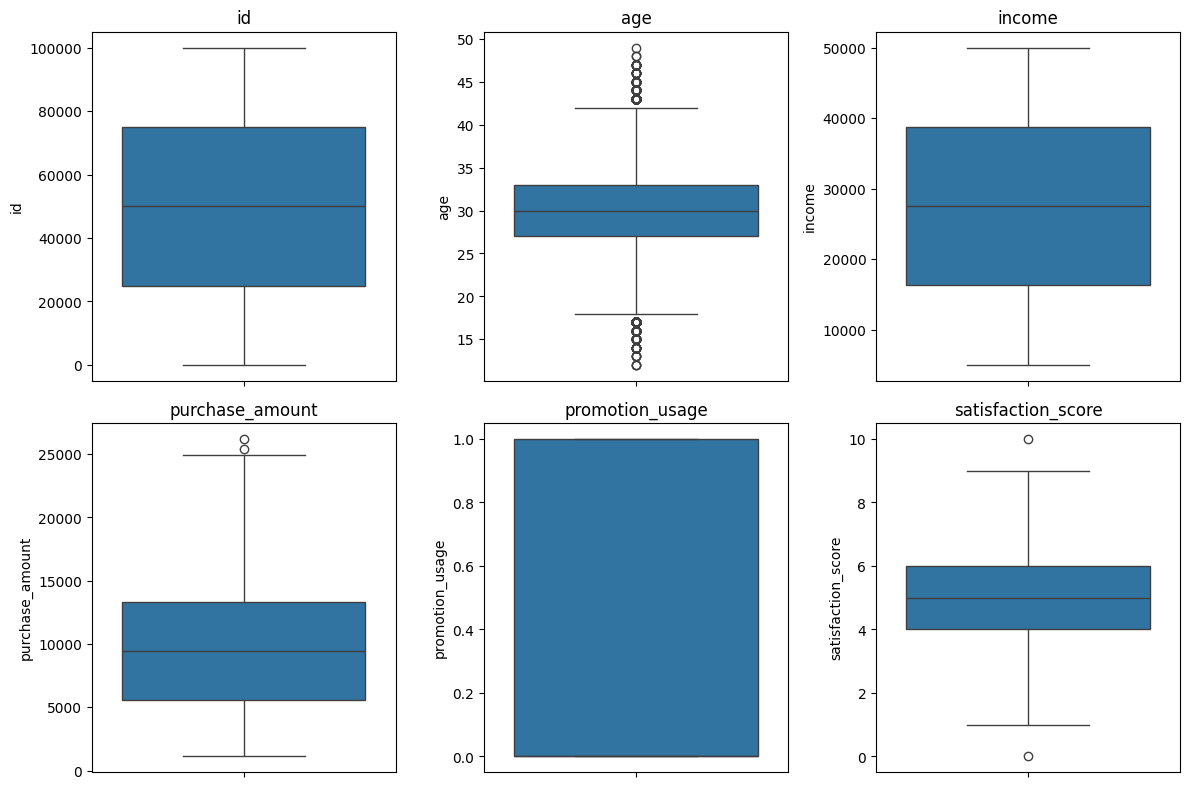

In [7]:
# 6. Distribution & Outlier Inspection
# ----------------------------
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

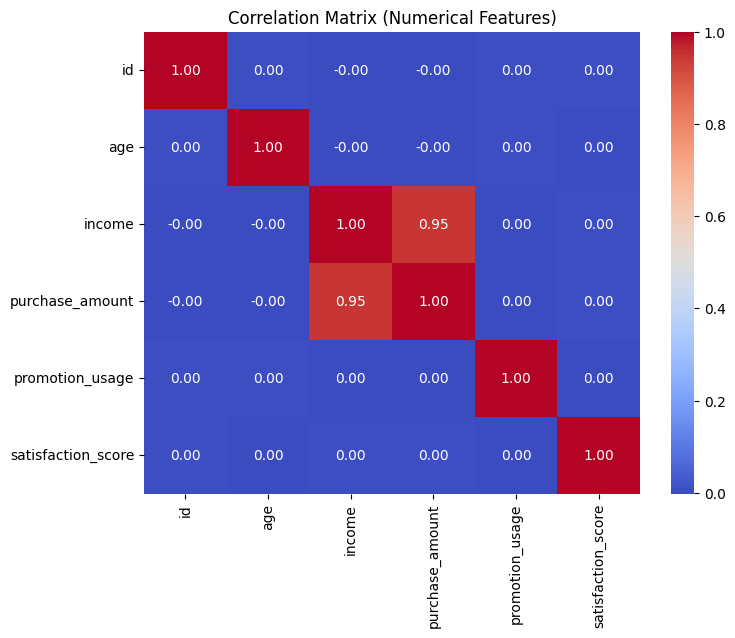

In [8]:
# 7. Correlation Check (Numerical Only)
# ----------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
# 1) Basic Cleaning: duplicates, sanity checks
# -----------------------------
# drop duplicate customer IDs (keep first)
if "id" in df.columns:
    df = df.drop_duplicates(subset=["id"], keep="first")
else:
    df = df.drop_duplicates()

In [11]:
# Optional: enforce plausible ranges (example rules; adjust if needed)
if "age" in df.columns:
    df.loc[(df["age"] < 15) | (df["age"] > 100), "age"] = np.nan

if "satisfaction_score" in df.columns:
    df.loc[(df["satisfaction_score"] < 1) | (df["satisfaction_score"] > 10), "satisfaction_score"] = np.nan

In [12]:
# 2) Outlier Handling (winsorization via IQR caps)
# -----------------------------
def iqr_cap(series: pd.Series, k: float = 1.5) -> pd.Series:
    """Cap outliers using IQR rule: [Q1 - k*IQR, Q3 + k*IQR]."""
    s = series.copy()
    s = s.astype(float)
    q1 = np.nanpercentile(s, 25)
    q3 = np.nanpercentile(s, 75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return s.clip(lower, upper)

for col in ["income", "purchase_amount"]:
    if col in df.columns:
        df[col] = iqr_cap(df[col], k=1.5)

In [13]:
# 3) Feature Engineering (domain-derived)
# -----------------------------
# Map purchase_frequency to numeric multiplier (proxy for number of purchases)
freq_map = {"rare": 1.0, "occasional": 2.0, "frequent": 4.0}

if "purchase_frequency" in df.columns and "purchase_amount" in df.columns:
    freq_mult = df["purchase_frequency"].map(freq_map)
    # if unknown category -> NaN; handle later via imputation
    df["freq_multiplier"] = freq_mult

    # Spend-per-purchase proxy: total / freq_multiplier
    df["spend_per_purchase_proxy"] = df["purchase_amount"] / df["freq_multiplier"]

if "promotion_usage" in df.columns and "purchase_amount" in df.columns:
    df["promo_intensity"] = df["promotion_usage"].astype(float) * df["purchase_amount"].astype(float)

# Optional: age band
if "age" in df.columns:
    df["age_band"] = pd.cut(
        df["age"],
        bins=[0, 24, 34, 44, 54, 64, 120],
        labels=["<25", "25-34", "35-44", "45-54", "55-64", "65+"]
    )

In [14]:
# 4) Define feature sets
# -----------------------------
# Drop ID from modeling features
features = df.copy()
if "id" in features.columns:
    features = features.drop(columns=["id"])

# Identify columns by intended treatment
ordinal_cols = []
ordinal_categories = []

# education (ordered)
if "education" in features.columns:
    ordinal_cols.append("education")
    ordinal_categories.append(["HighSchool", "Bachelor", "Masters", "PhD"])

# loyalty_status (ordered)
if "loyalty_status" in features.columns:
    ordinal_cols.append("loyalty_status")
    ordinal_categories.append(["Regular", "Silver", "Gold", "Platinum"])

# purchase_frequency (ordered)
if "purchase_frequency" in features.columns:
    ordinal_cols.append("purchase_frequency")
    ordinal_categories.append(["rare", "occasional", "frequent"])

# Nominal categories (one-hot)
nominal_cols = [c for c in ["gender", "region", "product_category", "age_band"] if c in features.columns]

# Numeric columns
numeric_cols = features.select_dtypes(include=[np.number]).columns.tolist()

# Remove any overlap just in case
numeric_cols = [c for c in numeric_cols if c not in ordinal_cols and c not in nominal_cols]


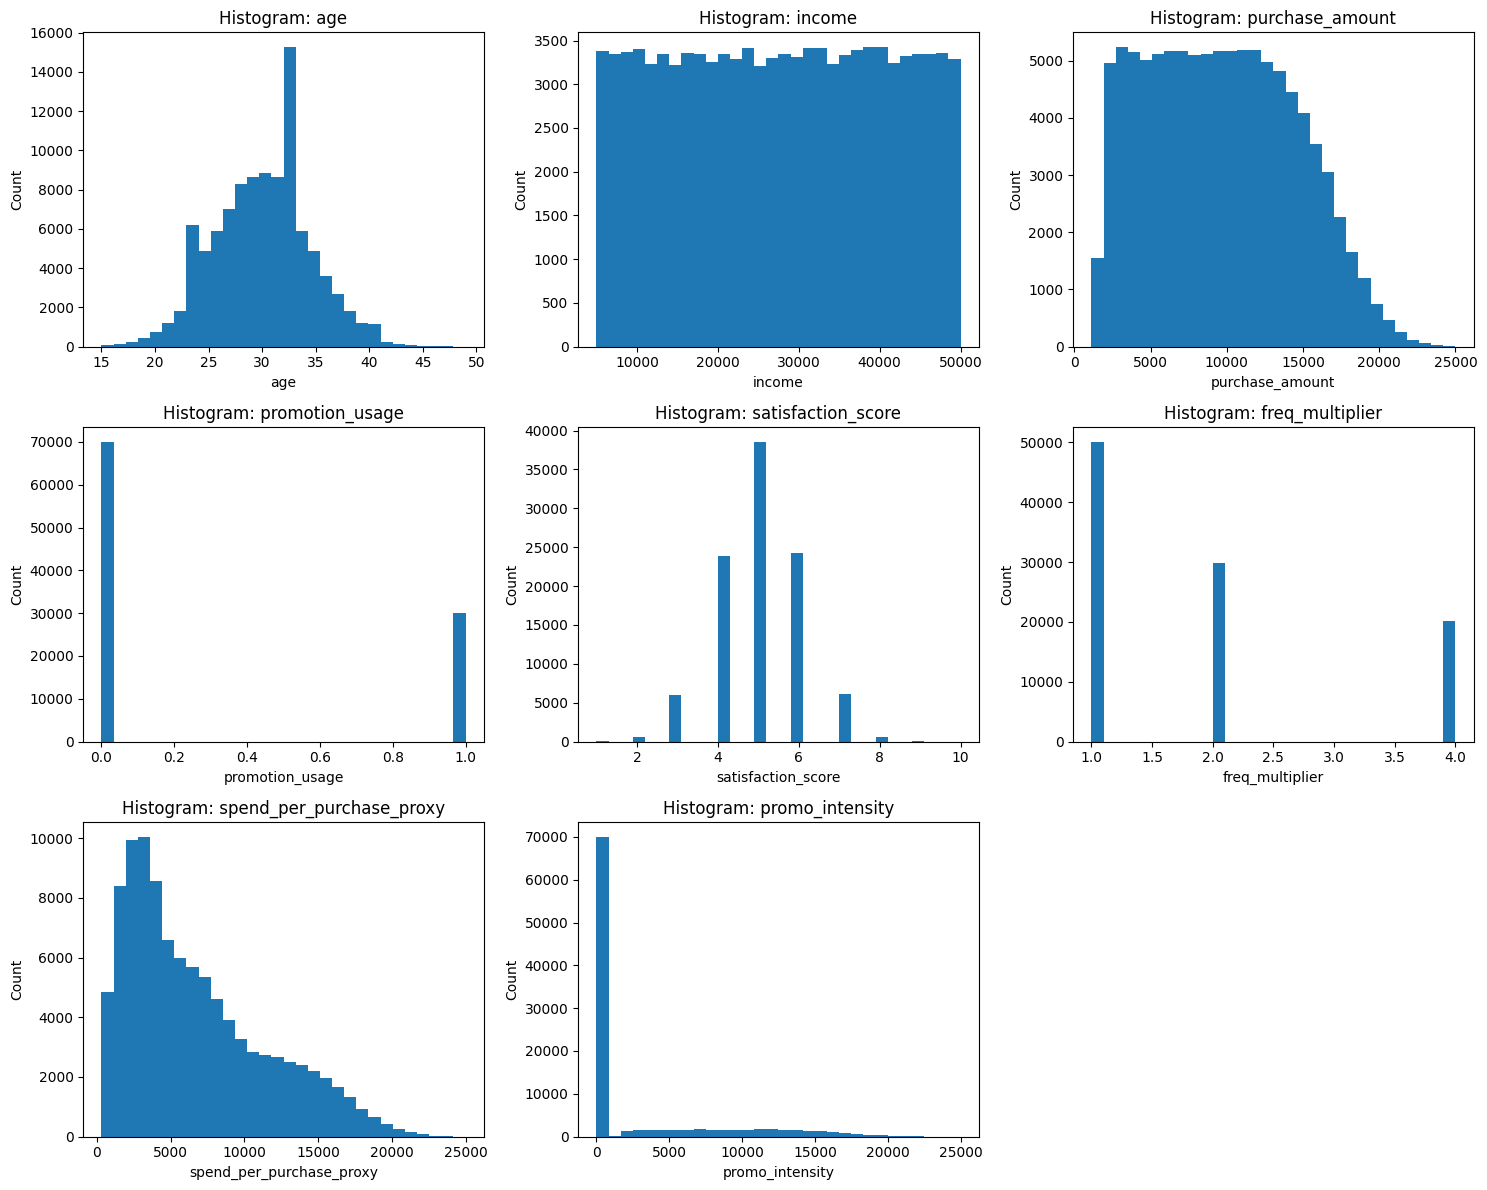

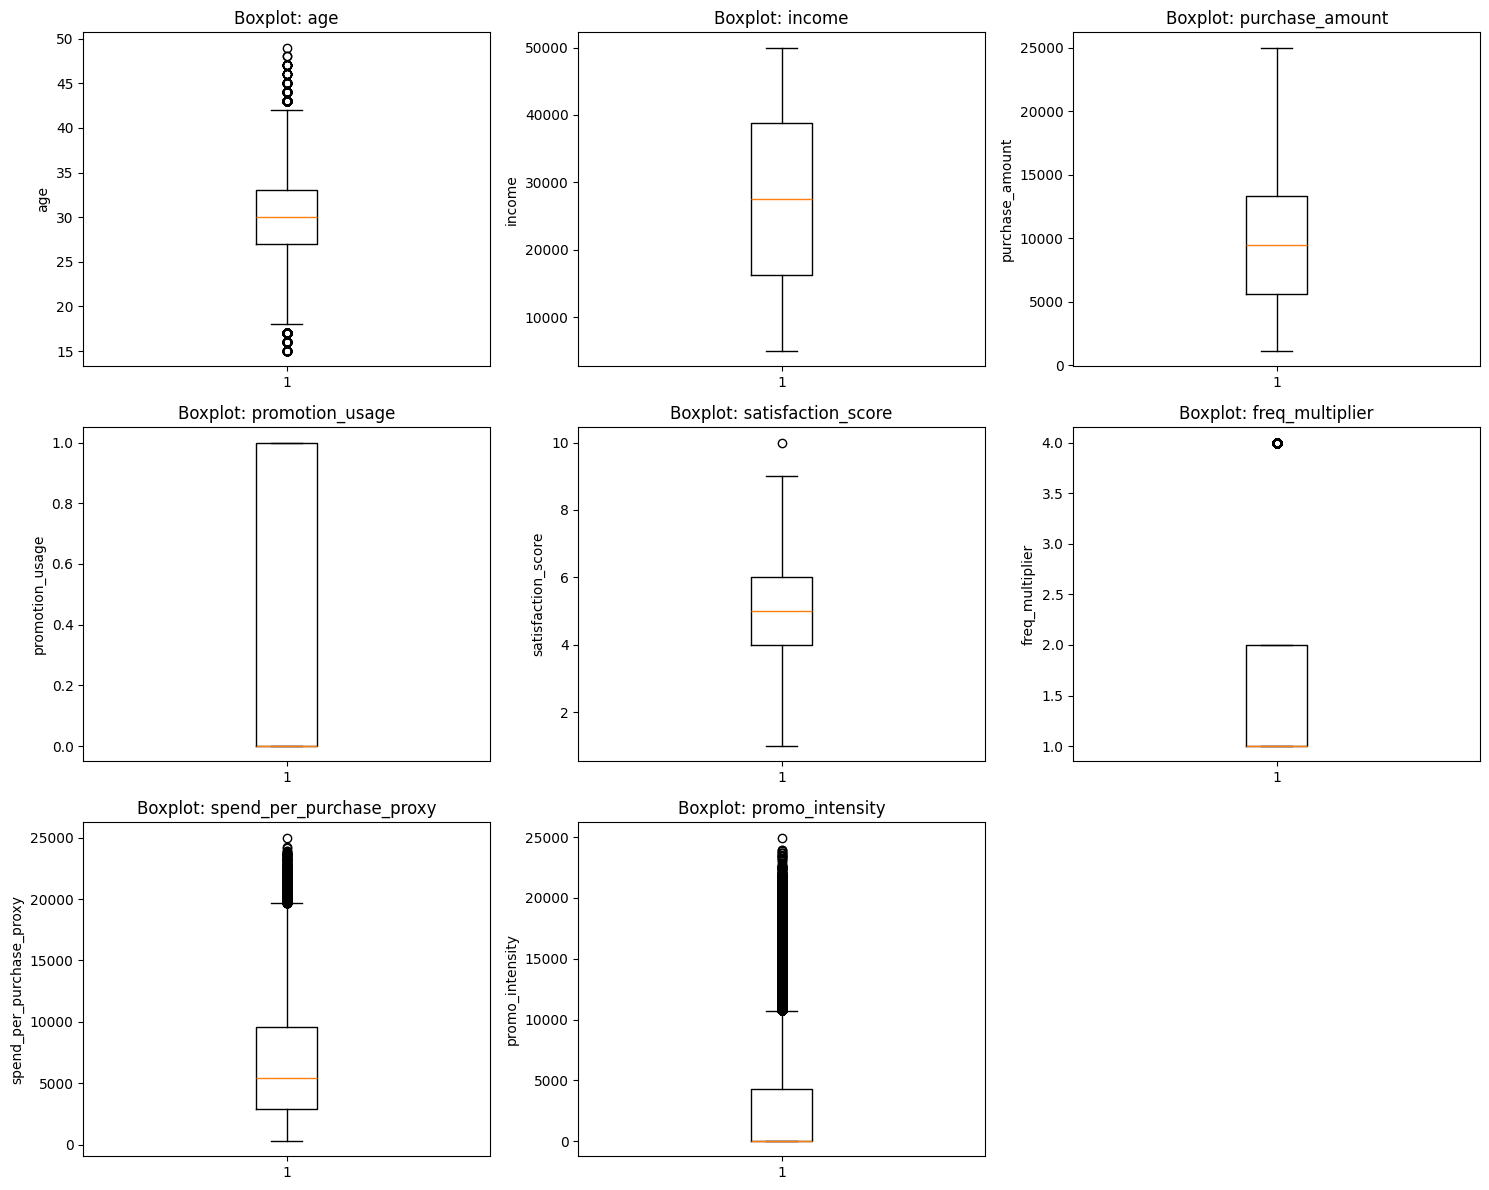

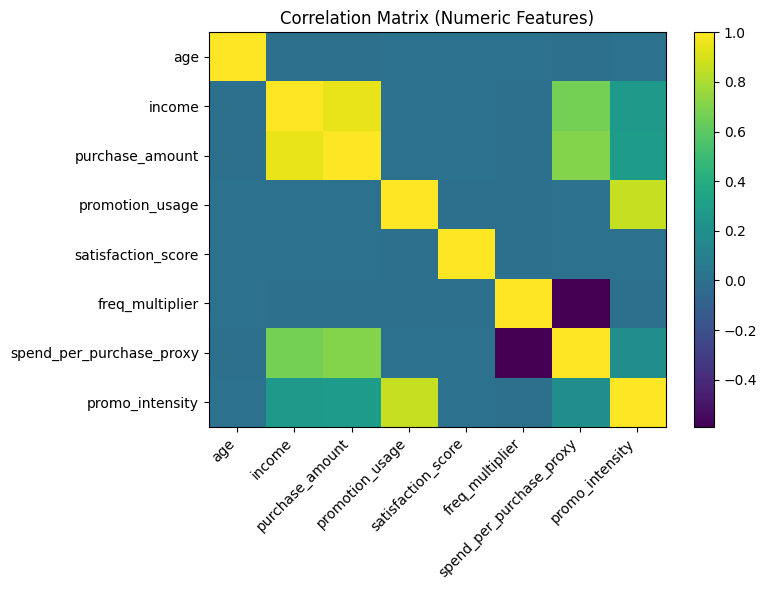

In [15]:
# 5) Applied EDA (quick plots)
# -----------------------------
def plot_numeric_distributions(data: pd.DataFrame, cols: list, ncols: int = 3):
    if not cols:
        return
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(5 * ncols, 4 * nrows))
    for i, col in enumerate(cols, 1):
        plt.subplot(nrows, ncols, i)
        plt.hist(data[col].dropna(), bins=30)
        plt.title(f"Histogram: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

def plot_numeric_boxplots(data: pd.DataFrame, cols: list, ncols: int = 3):
    if not cols:
        return
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(5 * ncols, 4 * nrows))
    for i, col in enumerate(cols, 1):
        plt.subplot(nrows, ncols, i)
        plt.boxplot(data[col].dropna(), vert=True)
        plt.title(f"Boxplot: {col}")
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

plot_numeric_distributions(features, [c for c in numeric_cols if c in features.columns])
plot_numeric_boxplots(features, [c for c in numeric_cols if c in features.columns])

# Correlation heatmap (numeric)
if numeric_cols:
    corr = features[numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title("Correlation Matrix (Numeric Features)")
    plt.tight_layout()
    plt.show()


In [16]:
# 6) Clustering Tendency: Hopkins Statistic
# -----------------------------
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X: np.ndarray, sample_size: int = 200, random_state: int = 42) -> float:
    """
    Hopkins statistic:
      ~0.5 indicates random structure
      closer to 1 suggests clusterable structure
    Works best on scaled numeric feature space.
    """
    rng = np.random.default_rng(random_state)
    n, d = X.shape
    m = min(sample_size, n)

    # sample m points from X
    idx = rng.choice(n, size=m, replace=False)
    X_sample = X[idx]

    # generate m uniform random points within min/max of X
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    U = rng.uniform(mins, maxs, size=(m, d))

    # nearest neighbor distances
    nn = NearestNeighbors(n_neighbors=2).fit(X)
    # for real points, use second neighbor to avoid distance to itself
    dist_x, _ = nn.kneighbors(X_sample, n_neighbors=2)
    w = dist_x[:, 1]

    nn_u = NearestNeighbors(n_neighbors=1).fit(X)
    dist_u, _ = nn_u.kneighbors(U, n_neighbors=1)
    u = dist_u[:, 0]

    H = u.sum() / (u.sum() + w.sum())
    return float(H)


In [17]:
# 7) Preprocessing Pipeline (impute + encode + scale)
# -----------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1))
])

nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("nom", nominal_transformer, nominal_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)


In [18]:
# 8) Feature Selection (Filter)
# -----------------------------
# Remove near-zero variance features after preprocessing
feature_selector = VarianceThreshold(threshold=1e-4)

# Full preprocessing + selection pipeline
prep_and_select = Pipeline(steps=[
    ("preprocess", preprocess),
    ("var_thresh", feature_selector),
])

X = prep_and_select.fit_transform(features)

# Feature names after preprocessing
feature_names = prep_and_select.named_steps["preprocess"].get_feature_names_out()
mask = prep_and_select.named_steps["var_thresh"].get_support()
selected_feature_names = feature_names[mask]

print("Final feature matrix shape:", X.shape)
print("Selected features:", len(selected_feature_names))

# Hopkins on engineered feature space (post scaling/encoding)
H = hopkins_statistic(X, sample_size=200, random_state=42)
print(f"Hopkins statistic (post-preprocessing): {H:.3f}")


Final feature matrix shape: (100000, 28)
Selected features: 28
Hopkins statistic (post-preprocessing): 0.842


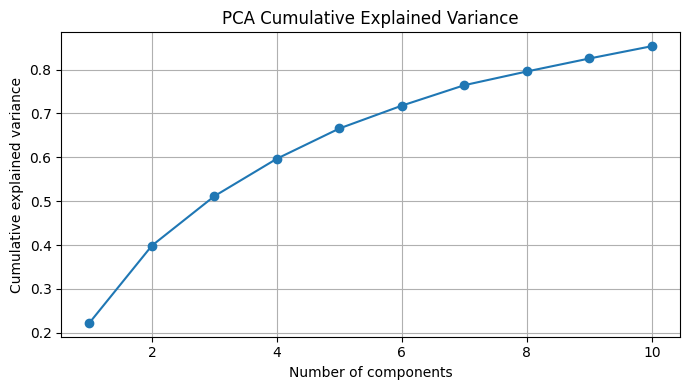

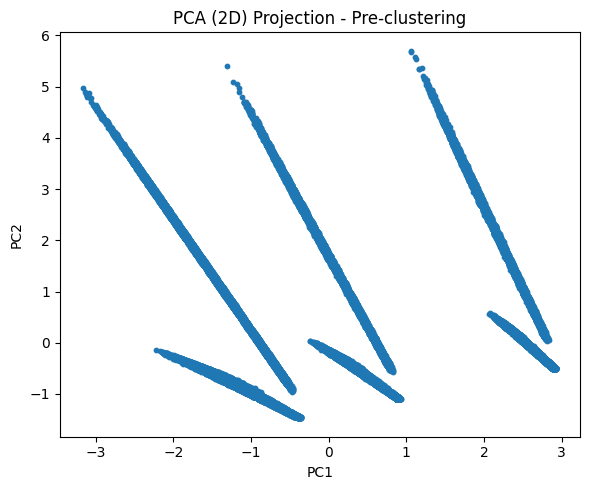

In [19]:
# 9) Dimensionality Reduction: PCA
# -----------------------------
pca = PCA(n_components=min(10, X.shape[1]), random_state=42)
X_pca = pca.fit_transform(X)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker="o")
plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: 2D PCA visualization basis (cluster labels added later)
X_pca2 = PCA(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], s=10)
plt.title("PCA (2D) Projection - Pre-clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


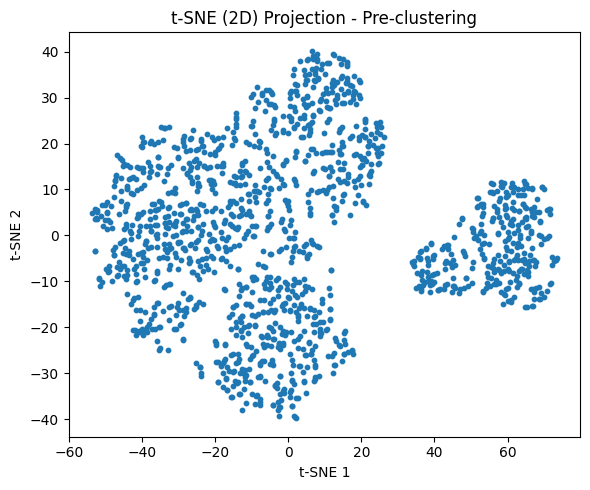

Saved: X_preprocessed.npy and selected_feature_names.csv


In [20]:
# 10) Optional: t-SNE visualization (for structure; not for training)
# -----------------------------
# Note: t-SNE can be slow; sample if dataset is large
max_tsne = 1500
X_tsne_input = X if X.shape[0] <= max_tsne else X[np.random.choice(X.shape[0], max_tsne, replace=False)]

tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="pca", random_state=42)
X_tsne = tsne.fit_transform(X_tsne_input)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
plt.title("t-SNE (2D) Projection - Pre-clustering")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

# Save processed matrix for next steps
np.save("X_preprocessed.npy", X)
pd.Series(selected_feature_names).to_csv("selected_feature_names.csv", index=False)
print("Saved: X_preprocessed.npy and selected_feature_names.csv")

In [21]:
# Step 4: Model Implementation (Clustering)
# Uses exact X_preprocessed.npy produced in Step 3

import os
import json
import time
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors



In [22]:
# 0) Reproducibility setup
# -----------------------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

ARTIFACT_DIR = "artifacts_step4"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

In [23]:
# 1) Load exact preprocessed matrix
# -----------------------------
X = np.load("C:\\Users\\Pol\\Desktop\\AIM ASS\\Capstone\\X_preprocessed.npy")  # exact output from Step 3
print("Loaded X_preprocessed.npy with shape:", X.shape)

# Optional: read feature names (useful later for profiling/explainability)
try:
    feature_names = pd.read_csv("C:\\Users\\Pol\\Desktop\\AIM ASS\\Capstone\\selected_feature_names.csv", header=None).iloc[:, 0].tolist()
except Exception:
    feature_names = None


Loaded X_preprocessed.npy with shape: (100000, 28)


In [24]:
# 2) Metric helper
# -----------------------------
def evaluate_clustering(X, labels):
    """
    Evaluate cluster labels for unsupervised clustering.
    Handles cases where silhouette is undefined (e.g., 1 cluster or too many noise points).
    """
    labels = np.asarray(labels)
    unique = np.unique(labels)

    # For DBSCAN, label -1 is noise; count "effective clusters" excluding noise
    unique_wo_noise = unique[unique != -1]
    n_clusters = len(unique_wo_noise) if (-1 in unique) else len(unique)

    # Silhouette requires at least 2 clusters and less than n_samples clusters
    silhouette = np.nan
    if n_clusters >= 2 and n_clusters < len(labels):
        # If DBSCAN has noise, silhouette can still be computed including noise, but often misleading.
        # We'll compute silhouette on non-noise points only if possible.
        if -1 in unique:
            mask = labels != -1
            if mask.sum() >= 2 and len(np.unique(labels[mask])) >= 2:
                silhouette = silhouette_score(X[mask], labels[mask])
        else:
            silhouette = silhouette_score(X, labels)

    # Davies-Bouldin and Calinski-Harabasz require >= 2 clusters, typically excluding noise
    dbi = np.nan
    ch = np.nan
    if n_clusters >= 2:
        if -1 in unique:
            mask = labels != -1
            if mask.sum() >= 2 and len(np.unique(labels[mask])) >= 2:
                dbi = davies_bouldin_score(X[mask], labels[mask])
                ch = calinski_harabasz_score(X[mask], labels[mask])
        else:
            dbi = davies_bouldin_score(X, labels)
            ch = calinski_harabasz_score(X, labels)

    return {
        "n_clusters": int(n_clusters),
        "silhouette": float(silhouette) if silhouette == silhouette else np.nan,
        "davies_bouldin": float(dbi) if dbi == dbi else np.nan,
        "calinski_harabasz": float(ch) if ch == ch else np.nan,
        "noise_points": int((labels == -1).sum()) if (-1 in unique) else 0
    }


def save_json(obj, path):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2)


In [25]:
# 3) K-MEANS: sweep K + elbow + silhouette
# -----------------------------
k_range = list(range(2, 11))
kmeans_records = []
inertias = []
silhouettes = []

for k in k_range:
    cfg = {"model": "kmeans", "k": k, "random_state": RANDOM_STATE, "n_init": 10}
    t0 = time.time()
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = km.fit_predict(X)
    t1 = time.time()

    metrics = evaluate_clustering(X, labels)
    metrics.update(cfg)
    metrics["fit_seconds"] = round(t1 - t0, 4)
    metrics["inertia"] = float(km.inertia_)

    kmeans_records.append(metrics)
    inertias.append(km.inertia_)
    silhouettes.append(metrics["silhouette"])

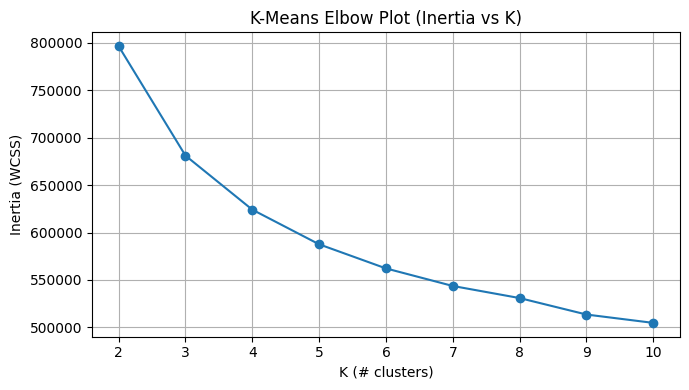

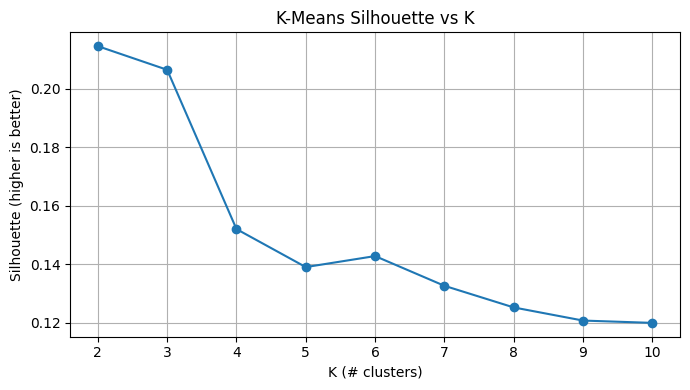

Best K by silhouette: 2 with silhouette: 0.21452206996802567


In [26]:
# Save sweep metrics
kmeans_df = pd.DataFrame(kmeans_records)
kmeans_df.to_csv(os.path.join(ARTIFACT_DIR, "kmeans_sweep_metrics.csv"), index=False)

# Plot Elbow (inertia) and Silhouette vs K
plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker="o")
plt.title("K-Means Elbow Plot (Inertia vs K)")
plt.xlabel("K (# clusters)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "kmeans_elbow.png"), dpi=150)
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(k_range, silhouettes, marker="o")
plt.title("K-Means Silhouette vs K")
plt.xlabel("K (# clusters)")
plt.ylabel("Silhouette (higher is better)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(ARTIFACT_DIR, "kmeans_silhouette.png"), dpi=150)
plt.show()

# Choose best K by silhouette (primary metric)
best_k_row = kmeans_df.sort_values("silhouette", ascending=False).iloc[0]
best_k = int(best_k_row["k"])
print("Best K by silhouette:", best_k, "with silhouette:", best_k_row["silhouette"])

# Train final best KMeans and save model + labels
final_km_cfg = {"model": "kmeans_final", "k": best_k, "random_state": RANDOM_STATE, "n_init": 10}
final_km = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10)
kmeans_labels = final_km.fit_predict(X)

joblib.dump(final_km, os.path.join(ARTIFACT_DIR, f"kmeans_k{best_k}.joblib"))
np.save(os.path.join(ARTIFACT_DIR, f"kmeans_k{best_k}_labels.npy"), kmeans_labels)
save_json(final_km_cfg, os.path.join(ARTIFACT_DIR, f"kmeans_k{best_k}_config.json"))


In [27]:
# 4) HIERARCHICAL (Agglomerative): sweep k + linkage
# -----------------------------
from sklearn.decomposition import PCA

# ---- Memory-safe Hierarchical setup ----
PCA_COMPONENTS = 10
MAX_HIER_SAMPLES = 3000

# Reduce dimensionality first
pca_for_hier = PCA(n_components=PCA_COMPONENTS, random_state=42)
X_hier = pca_for_hier.fit_transform(X)

# Subsample rows
if X_hier.shape[0] > MAX_HIER_SAMPLES:
    rng = np.random.default_rng(42)
    idx = rng.choice(X_hier.shape[0], MAX_HIER_SAMPLES, replace=False)
    X_hier_sub = X_hier[idx]
else:
    X_hier_sub = X_hier

print("Hierarchical clustering input shape:", X_hier_sub.shape)

# ---- Hierarchical sweep ----
linkages = ["ward", "complete", "average"]
hier_records = []

for linkage in linkages:
    for k in k_range:

        model = AgglomerativeClustering(
            n_clusters=k,
            linkage=linkage
        )

        t0 = time.time()
        labels = model.fit_predict(X_hier_sub)
        t1 = time.time()

        metrics = evaluate_clustering(X_hier_sub, labels)
        metrics.update({
            "model": "agglomerative",
            "k": k,
            "linkage": linkage,
            "fit_seconds": round(t1 - t0, 4),
            "note": "PCA-reduced (10 comps) + subsampled (max 3000)"
        })

        hier_records.append(metrics)

hier_df = pd.DataFrame(hier_records)
hier_df.to_csv(
    os.path.join(ARTIFACT_DIR, "hierarchical_sweep_metrics.csv"),
    index=False
)

best_hier = hier_df.sort_values("silhouette", ascending=False).iloc[0]
print("Best Hierarchical (memory-safe):")
print(best_hier)

# Save config for reproducibility
hier_cfg = {
    "model": "AgglomerativeClustering",
    "pca_components": PCA_COMPONENTS,
    "max_samples": MAX_HIER_SAMPLES,
    "best_k": int(best_hier["k"]),
    "best_linkage": best_hier["linkage"],
    "note": "Used PCA + subsampling due to O(n^2) memory complexity"
}

with open(os.path.join(ARTIFACT_DIR, "hierarchical_config.json"), "w") as f:
    json.dump(hier_cfg, f, indent=2)



Hierarchical clustering input shape: (3000, 10)
Best Hierarchical (memory-safe):
n_clusters                                                        2
silhouette                                                 0.250862
davies_bouldin                                             1.514951
calinski_harabasz                                        767.226207
noise_points                                                      0
model                                                 agglomerative
k                                                                 2
linkage                                                        ward
fit_seconds                                                  0.4657
note                 PCA-reduced (10 comps) + subsampled (max 3000)
Name: 0, dtype: object


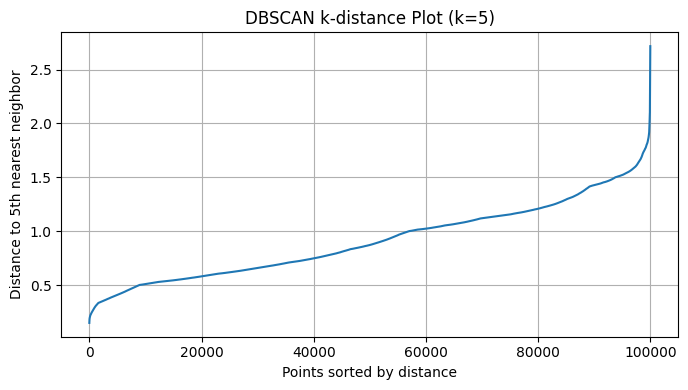

Best DBSCAN: {'n_clusters': np.int64(5), 'silhouette': np.float64(0.6925072807329404), 'davies_bouldin': np.float64(0.371790898632752), 'calinski_harabasz': np.float64(624.3328513880657), 'noise_points': np.int64(99937), 'model': 'dbscan', 'eps': np.float64(0.3), 'min_samples': np.int64(10), 'fit_seconds': np.float64(8.4424)}


In [28]:
# 5) DBSCAN: eps selection + sweep
# -----------------------------
def plot_k_distance(X, k=5, outpath=None):
    """
    k-distance plot for DBSCAN eps guidance.
    For each point, compute distance to its k-th nearest neighbor, sort, plot.
    """
    nn = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nn.kneighbors(X)
    k_dist = np.sort(distances[:, -1])

    plt.figure(figsize=(7, 4))
    plt.plot(k_dist)
    plt.title(f"DBSCAN k-distance Plot (k={k})")
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {k}th nearest neighbor")
    plt.grid(True)
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath, dpi=150)
    plt.show()

plot_k_distance(X, k=5, outpath=os.path.join(ARTIFACT_DIR, "dbscan_kdist_k5.png"))

# DBSCAN sweep (tune ranges based on k-distance plot)
eps_values = [0.3, 0.5, 0.8, 1.0, 1.2]
min_samples_values = [5, 10, 20]

db_records = []
for eps in eps_values:
    for ms in min_samples_values:
        cfg = {"model": "dbscan", "eps": eps, "min_samples": ms}
        t0 = time.time()
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X)
        t1 = time.time()

        metrics = evaluate_clustering(X, labels)
        metrics.update(cfg)
        metrics["fit_seconds"] = round(t1 - t0, 4)
        db_records.append(metrics)

db_df = pd.DataFrame(db_records)
db_df.to_csv(os.path.join(ARTIFACT_DIR, "dbscan_sweep_metrics.csv"), index=False)

# Choose best DBSCAN by silhouette (on non-noise points), tie-break by fewer noise points
db_sorted = db_df.sort_values(["silhouette", "noise_points"], ascending=[False, True])
best_db = db_sorted.iloc[0]
print("Best DBSCAN:", dict(best_db))

best_db_cfg = {"model": "dbscan_final", "eps": float(best_db["eps"]), "min_samples": int(best_db["min_samples"])}
best_db_model = DBSCAN(eps=best_db_cfg["eps"], min_samples=best_db_cfg["min_samples"])
db_labels = best_db_model.fit_predict(X)

joblib.dump(best_db_model, os.path.join(ARTIFACT_DIR, f"dbscan_eps{best_db_cfg['eps']}_ms{best_db_cfg['min_samples']}.joblib"))
np.save(os.path.join(ARTIFACT_DIR, f"dbscan_eps{best_db_cfg['eps']}_ms{best_db_cfg['min_samples']}_labels.npy"), db_labels)
save_json(best_db_cfg, os.path.join(ARTIFACT_DIR, f"dbscan_eps{best_db_cfg['eps']}_ms{best_db_cfg['min_samples']}_config.json"))



In [29]:
# 6) Final comparison table (best per family)
# -----------------------------
best_kmeans = kmeans_df.sort_values("silhouette", ascending=False).iloc[0].to_dict()
best_hier = best_hier.to_dict()
best_db = best_db.to_dict()

comparison = pd.DataFrame([
    {
        "model_family": "KMeans",
        "config": f"k={int(best_kmeans['k'])}",
        "n_clusters": best_kmeans["n_clusters"],
        "silhouette": best_kmeans["silhouette"],
        "davies_bouldin": best_kmeans["davies_bouldin"],
        "calinski_harabasz": best_kmeans["calinski_harabasz"],
        "noise_points": best_kmeans["noise_points"]
    },
    {
        "model_family": "Hierarchical",
        "config": f"linkage={best_hier['linkage']}, k={int(best_hier['k'])}",
        "n_clusters": best_hier["n_clusters"],
        "silhouette": best_hier["silhouette"],
        "davies_bouldin": best_hier["davies_bouldin"],
        "calinski_harabasz": best_hier["calinski_harabasz"],
        "noise_points": best_hier["noise_points"]
    },
    {
        "model_family": "DBSCAN",
        "config": f"eps={best_db['eps']}, min_samples={int(best_db['min_samples'])}",
        "n_clusters": best_db["n_clusters"],
        "silhouette": best_db["silhouette"],
        "davies_bouldin": best_db["davies_bouldin"],
        "calinski_harabasz": best_db["calinski_harabasz"],
        "noise_points": best_db["noise_points"]
    },
])

comparison = comparison.sort_values("silhouette", ascending=False)
print("\n=== Model Comparison (sorted by silhouette) ===")
print(comparison)

comparison.to_csv(os.path.join(ARTIFACT_DIR, "model_comparison_best.csv"), index=False)

# Save a single "run config" for traceability
run_config = {
    "random_state": RANDOM_STATE,
    "X_shape": list(X.shape),
    "k_range": k_range,
    "kmeans_best": best_kmeans,
    "hierarchical_best": best_hier,
    "dbscan_best": best_db,
    "artifacts_dir": ARTIFACT_DIR
}
save_json(run_config, os.path.join(ARTIFACT_DIR, "step4_run_config.json"))

print("\nSaved artifacts to:", ARTIFACT_DIR)


=== Model Comparison (sorted by silhouette) ===
   model_family                   config  n_clusters  silhouette  \
2        DBSCAN  eps=0.3, min_samples=10           5    0.692507   
1  Hierarchical        linkage=ward, k=2           2    0.250862   
0        KMeans                      k=2           2    0.214522   

   davies_bouldin  calinski_harabasz  noise_points  
2        0.371791         624.332851         99937  
1        1.514951         767.226207             0  
0        1.699377       20554.085761             0  

Saved artifacts to: artifacts_step4


In [30]:
cluster_labels = np.load("artifacts_step4/kmeans_k2_labels.npy")


In [31]:
print(len(df), len(cluster_labels))


100000 100000


In [32]:
df["cluster"] = cluster_labels
df["cluster"] = df["cluster"].astype("category")


In [48]:
df["income_band"] = pd.qcut(
    df["income"],
    q=4,
    labels=["Low", "Lower-Mid", "Upper-Mid", "High"]
)

income_band_by_cluster = (
    pd.crosstab(
        df["income_band"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

income_band_by_cluster


cluster,0,1
income_band,,
Low,24.9,25.0
Lower-Mid,25.6,24.9
Upper-Mid,24.6,25.1
High,24.9,25.0


In [49]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 24, 34, 44, 54, 120],
    labels=["<25", "25–34", "35–44", "45–54", "55+"]
)

age_group_by_cluster = (
    pd.crosstab(
        df["age_group"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

age_group_by_cluster


cluster,0,1
age_group,,
<25,10.3,11.0
25–34,73.8,73.2
35–44,15.8,15.7
45–54,0.1,0.1


In [50]:
gender_by_cluster = (
    pd.crosstab(
        df["gender"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

gender_by_cluster


cluster,0,1
gender,,
Female,50.1,50.1
Male,49.9,49.9


In [39]:
purchase_amount_by_cluster = (
    df.groupby("cluster")["purchase_amount"]
      .mean()
      .round(2)
)

purchase_amount_by_cluster


C:\Users\Pol\AppData\Local\Temp\ipykernel_4360\860777517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cluster")["purchase_amount"]


cluster
0    9616.85
1    9639.28
Name: purchase_amount, dtype: float64

In [40]:
purchase_freq_by_cluster = (
    pd.crosstab(
        df["purchase_frequency"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

purchase_freq_by_cluster


cluster,0,1
purchase_frequency,,
frequent,100.0,0.0
occasional,0.0,37.4
rare,0.0,62.6


In [41]:
promotion_usage_by_cluster = (
    df.groupby("cluster")["promotion_usage"]
      .mean()
      .round(2)
)

promotion_usage_by_cluster


C:\Users\Pol\AppData\Local\Temp\ipykernel_4360\1130105144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cluster")["promotion_usage"]


cluster
0    0.3
1    0.3
Name: promotion_usage, dtype: float64

In [42]:
education_by_cluster = (
    pd.crosstab(
        df["education"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

education_by_cluster


cluster,0,1
education,,
Bachelor,30.5,30.2
College,39.1,40.1
HighSchool,20.1,20.0
Masters,10.2,9.7


In [43]:
region_by_cluster = (
    pd.crosstab(
        df["region"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

region_by_cluster


cluster,0,1
region,,
East,30.2,30.0
North,19.9,19.9
South,20.2,20.1
West,29.8,30.0


In [44]:
loyalty_by_cluster = (
    pd.crosstab(
        df["loyalty_status"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

loyalty_by_cluster


cluster,0,1
loyalty_status,,
Gold,9.9,9.9
Regular,59.7,60.3
Silver,30.4,29.8


In [45]:
satisfaction_mean_by_cluster = (
    df.groupby("cluster")["satisfaction_score"]
      .mean()
      .round(2)
)

satisfaction_mean_by_cluster


C:\Users\Pol\AppData\Local\Temp\ipykernel_4360\2485486434.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cluster")["satisfaction_score"]


cluster
0    5.01
1    5.01
Name: satisfaction_score, dtype: float64

In [46]:
product_category_by_cluster = (
    pd.crosstab(
        df["product_category"],
        df["cluster"],
        normalize="columns"
    ) * 100
).round(1)

product_category_by_cluster


cluster,0,1
product_category,,
Beauty,5.1,5.0
Books,14.9,14.9
Clothing,20.1,20.0
Electronics,29.6,30.1
Food,14.8,14.8
Health,10.3,10.1
Home,5.2,5.0
